In [1]:
%cd /content/drive/My Drive/bandori/main/afterglow_dataset

/content/drive/My Drive/bandori/main/afterglow_dataset


In [0]:
import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import  Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
classes = ['ran', 'moca', 'himari', 'tsugumi', 'tomoe']
num_classes = len(classes)
img_size = 64

In [0]:
X_train, X_test, y_train, y_test = np.load('dataset.npy', allow_pickle=True)

In [0]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
input_shape =(64, 64, 3)
kernel_size = (3, 3)
out_num = len(classes)

model = Sequential()
model.add(Conv2D(32, kernel_size, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_num, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [0]:
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy()

model.compile(optimizer=opt,
              loss=loss,
              metrics=[acc])

In [0]:
path = 'afterglow_model.h5'
cp = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)

In [34]:
bs = 128
ep = 50

history = model.fit(X_train,
                    y_train,
                    batch_size=bs,
                    epochs=ep,
                    validation_data=(X_test, y_test),
                    callbacks=[cp],
                    )

Epoch 1/50
9/9 [==============================] - 3s 341ms/step - loss: 1.9671 - categorical_accuracy: 0.2203 - val_loss: 1.6041 - val_categorical_accuracy: 0.2968
Epoch 2/50
9/9 [==============================] - 1s 162ms/step - loss: 1.5700 - categorical_accuracy: 0.3577 - val_loss: 1.5526 - val_categorical_accuracy: 0.5668
Epoch 3/50
9/9 [==============================] - 1s 164ms/step - loss: 1.3683 - categorical_accuracy: 0.5183 - val_loss: 1.1763 - val_categorical_accuracy: 0.6257
Epoch 4/50
9/9 [==============================] - 0s 50ms/step - loss: 1.0200 - categorical_accuracy: 0.5870 - val_loss: 0.8844 - val_categorical_accuracy: 0.6150
Epoch 5/50
9/9 [==============================] - 1s 165ms/step - loss: 0.7883 - categorical_accuracy: 0.6842 - val_loss: 0.6396 - val_categorical_accuracy: 0.8342
Epoch 6/50
9/9 [==============================] - 1s 161ms/step - loss: 0.5955 - categorical_accuracy: 0.7779 - val_loss: 0.4691 - val_categorical_accuracy: 0.8850
Epoch 7/50
9/9 [=

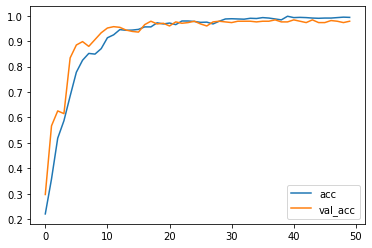

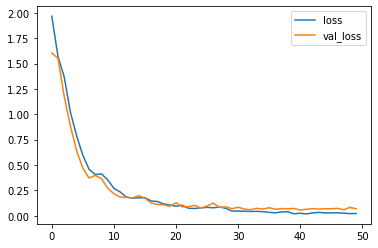

In [35]:
DataFrame({'acc': history.history['categorical_accuracy'], 
           'val_acc': history.history['val_categorical_accuracy']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()